In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


In [3]:

print("--- DataFrame Info ---")
df.info()

print("\n" + "="*40 + "\n")

print("--- Missing Value Counts ---")
print(df.isnull().sum())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int32         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 7.0+ KB


--- Missing Value Counts ---
date            0
region          0
age             0
income          5
transactions    0
spend           3
dtype: int64


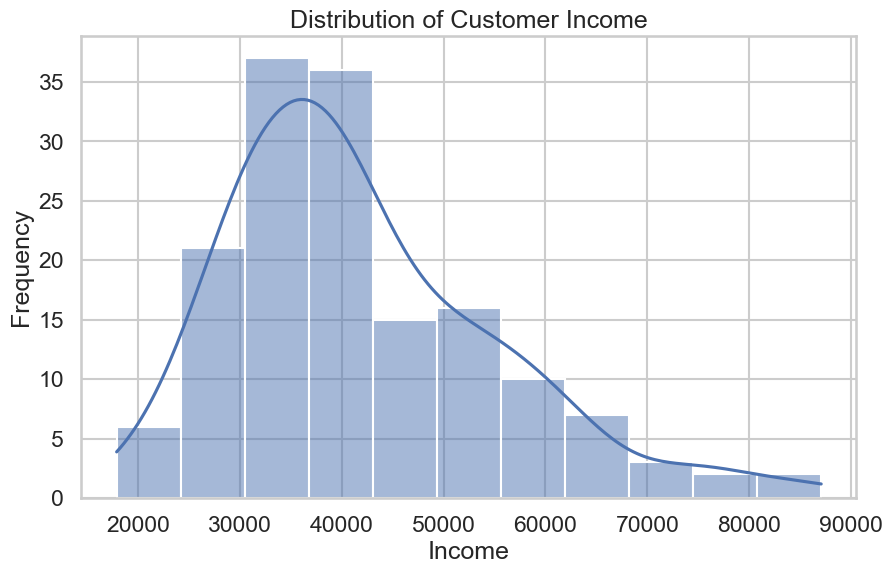

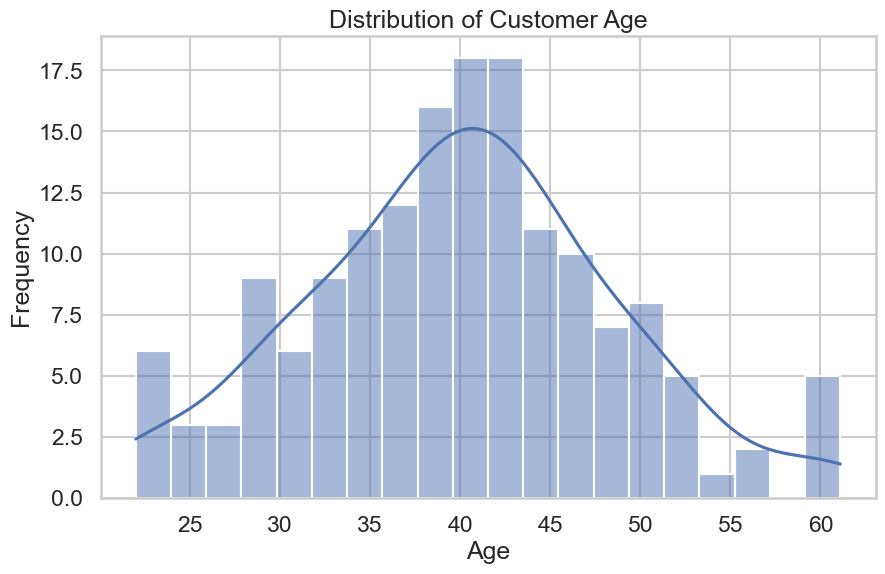

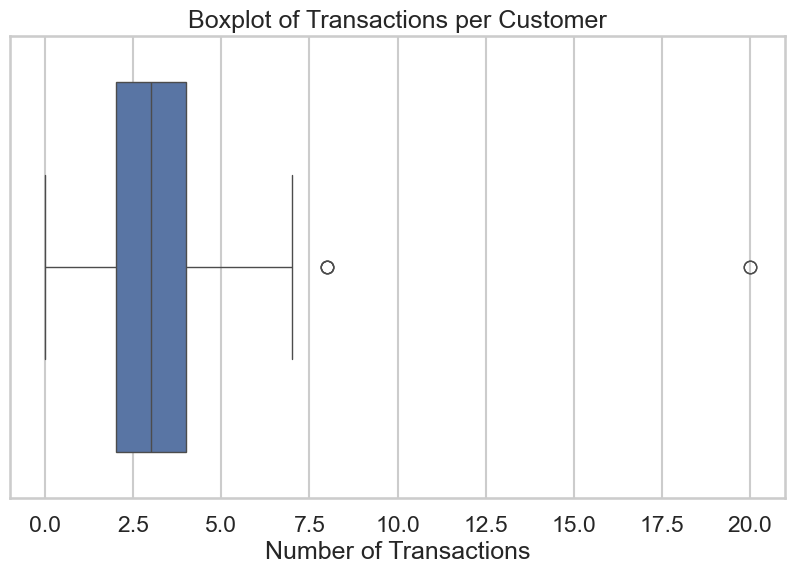

In [5]:
# Plot 1: Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], kde=True)
plt.title('Distribution of Customer Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Boxplot for Transactions to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['transactions'])
plt.title('Boxplot of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.show()

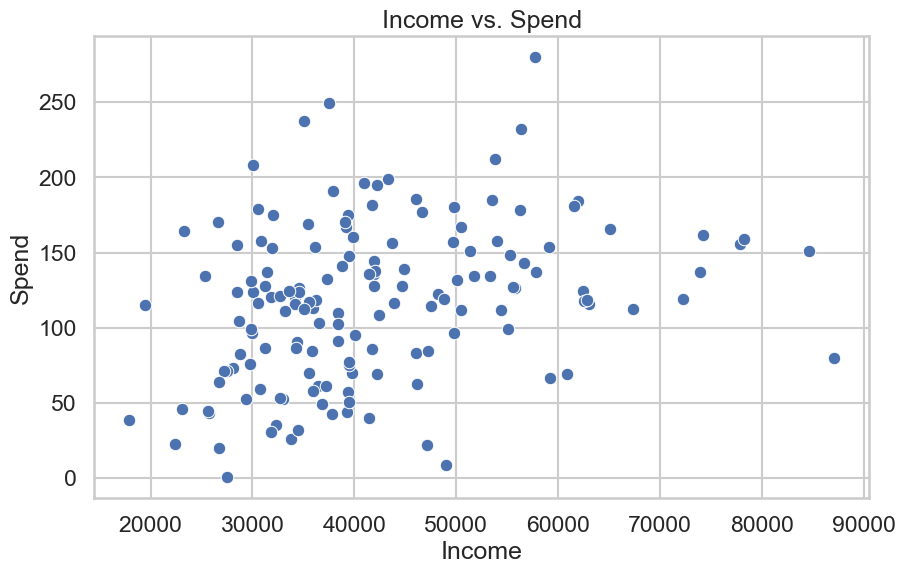

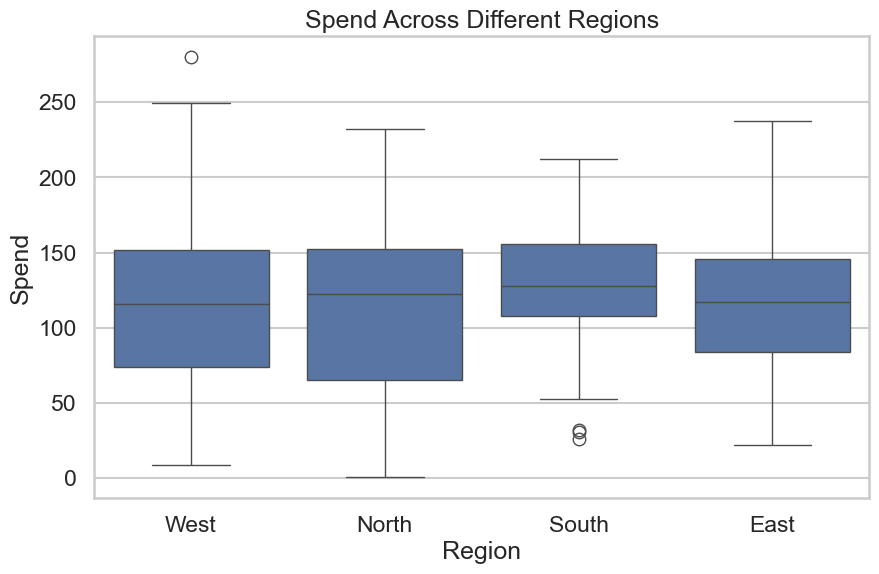

In [7]:
# Relationship 1: Income vs. Spend (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='spend')
plt.title('Income vs. Spend')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.show()

# Relationship 2: Region vs. Spend (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='spend')
plt.title('Spend Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Spend')
plt.show()

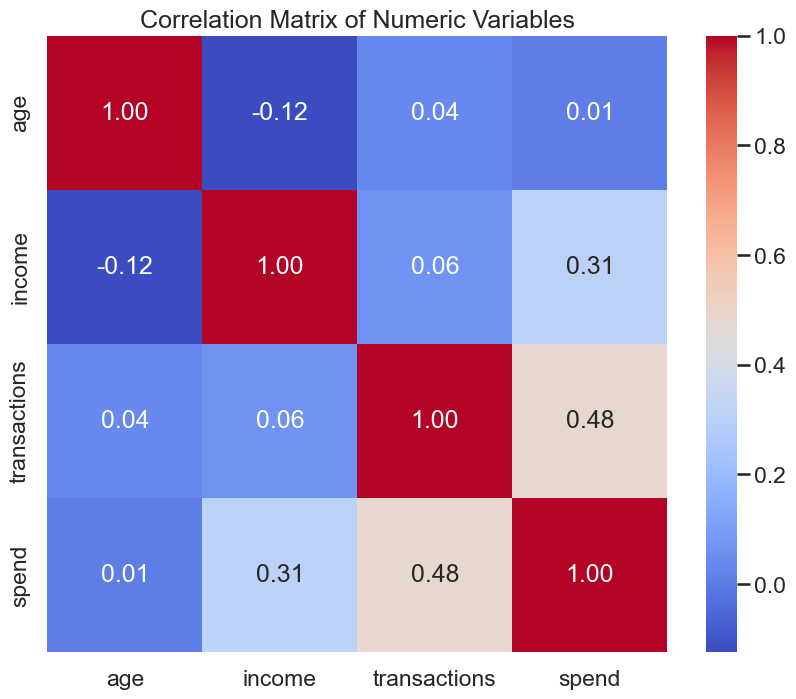

In [9]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()